Table of contents:

|No.|Topic|
|:------|:------|
|1.|[Idea 1 - BMI](#section_id1)|
|2.|[Idea 2 - Drug use](#section_id2)|

<a id='section_id1'></a>
# Idea 1 - BMI

In [360]:
#pandas and numpy
import pandas as pd
import numpy as np

# for regressions with statsmodels:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.graphics.regressionplots import plot_leverage_resid2

# for regressions with scikit-learn:
import sklearn.linear_model as sklm
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
import scikitplot as skplt
from sklearn.metrics import confusion_matrix, classification_report, precision_score, \
                            accuracy_score, roc_curve, roc_auc_score
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, \
                            BaggingClassifier, BaggingRegressor, \
                            GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, \
                            classification_report, precision_score, \
                            accuracy_score, roc_curve, roc_auc_score

#for plotting decision trees
import pydotplus as pplus
import graphviz
from IPython.display import Image
from six import StringIO
# if not found: ! pip install six

#for modeling with decision trees
from sklearn.tree import export_graphviz

# for KNN:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

#These are utility tools of the DMBA book. 
#Install the "dmba" package first (just one time)

# !pip install dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import classificationSummary, gainsChart, liftChart, plotDecisionTree
from dmba.metric import AIC_score

# visualization and tuning the aesthetics
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex = False)
plt.rc('font', family = 'serif')
plt.rc('xtick', labelsize = 10) 
plt.rc('ytick', labelsize = 10) 
plt.rc('font', size = 12) 
plt.rc('figure', figsize = (6, 5))

In [226]:
pd.set_option("display.max_columns", None)
yrbs = pd.read_csv("yrbsdata.csv", dtype='object')
yrbs.shape

(962925, 150)

In [227]:
yrbs.head()

,sitecode,sitename,sitetype,sitetypenum,year,survyear,weight,stratum,PSU,record,age,sex,grade,race4,race7,stheight,stweight,bmi,bmipct,qnobese,qnowt,q67,q66,sexid,sexid2,sexpart,sexpart2,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30,q31,q32,q33,q34,q35,q36,q37,q38,q39,q40,q41,q42,q43,q44,q45,q46,q47,q48,q49,q50,q51,q52,q53,q54,q55,q56,q57,q58,q59,q60,q61,q62,q63,q64,q65,q68,q69,q70,q71,q72,q73,q74,q75,q76,q77,q78,q79,q80,q81,q82,q83,q84,q85,q86,q87,q88,q89,qbikehelmet,qdrivemarijuana,qcelldriving,qpropertydamage,qbullyweight,qbullygender,qbullygay,qchokeself,qcigschool,qchewtobschool,qalcoholschool,qtypealcohol,qhowmarijuana,qmarijuanaschool,qcurrentcocaine,qcurrentheroin,qcurrentmeth,qhallucdrug,qprescription30d,qgenderexp,qtaughtHIV,qtaughtsexed,qtaughtstd,qtaughtcondom,qtaughtbc,qdietpop,qcoffeetea,qsportsdrink,qenergydrink,qsugardrink,qwater,qfastfood,qfoodallergy,qwenthungry,qmusclestrength,qsunscreenuse,qindoortanning,qsunburn,qconcentrating,qcurrentasthma,qwheresleep,qspeakenglish,qtransgender
0,KY,Kentucky (KY),State,2,2007,9,51.6402,28,2,648526,7,1,4,1,6,1.63,56.7,21.34066017,49.07165942,2,2,NaN,NaN,NaN,NaN,NaN,NaN,5,1,NaN,NaN,1,1,NaN,1,1,1,1,2,NaN,NaN,NaN,NaN,NaN,1,2,2,1,1,1,NaN,1,1,NaN,NaN,NaN,NaN,1,NaN,3,7,2,8,NaN,NaN,1,1,1,1,1,1,1,1,NaN,1,NaN,1,2,1,8,3,4,3,2,4,3,3,4,2,2,4,2,5,3,NaN,NaN,8,3,2,6,3,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
1,KY,Kentucky (KY),State,2,2007,9,104.2187,18,2,648527,7,1,4,1,6,1.93,90.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1,NaN,NaN,1,1,NaN,1,1,1,1,2,NaN,NaN,NaN,NaN,NaN,2,2,2,1,1,1,NaN,1,1,NaN,NaN,NaN,NaN,1,NaN,2,1,1,1,NaN,NaN,1,1,1,1,1,1,1,1,NaN,1,NaN,1,2,1,8,2,2,3,2,4,4,1,1,1,1,1,1,1,2,NaN,NaN,6,4,4,6,1,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN
2,KY,Kentucky (KY),State,2,2007,9,33.2209,6,2,648528,7,1,4,4,7,1.7,61.24,21.19031142,47.13225379,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2,1,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN,2,NaN,3,3,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,3,2,1,NaN,4,NaN,2,1,NaN,2,4,4,2,NaN,2,3,1,1,2,2,2,2,2,2,NaN,NaN,1,2,3,1,2,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN
3,KY,Kentucky (KY),State,2,2007,9,29.7973,29,2,648529,7,1,3,1,6,1.68,62.14,22.01672336,57.22512416,2,2,NaN,NaN,NaN,NaN,NaN,NaN,5,1,NaN,NaN,1,1,NaN,1,1,1,1,2,NaN,NaN,NaN,NaN,NaN,2,2,2,1,1,1,NaN,7,3,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN,NaN,1,1,1,1,1,1,1,1,NaN,1,NaN,1,2,1,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KY,Kentucky (KY),State,2,2007,9,29.8429,8,1,648530,7,1,3,1,6,1.57,65.77,26.68262404,87.80684545,2,1,NaN,NaN,NaN,NaN,NaN,NaN,3,1,NaN,NaN,1,1,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,2,2,2,1,1,1,NaN,1,1,NaN,NaN,NaN,NaN,1,NaN,7,2,3,5,NaN,NaN,7,3,4,2,2,1,1,1,NaN,1,NaN,1,2,1,6,4,3,2,3,7,3,4,7,5,4,1,6,7,6,NaN,NaN,1,2,1,1,1,NaN,NaN,2,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [228]:
bmi_yrbs = yrbs[["sitecode", "sex", "race7", "bmi", "qnobese", "q23", "q24", "q25", "q26", "q32", "q33", "q35", "q36", "q37", "q38", "q40", "q42", "q48", "q49", "q50", "q51", "q52", "q53", "q70", "q71", "q72", "q73", "q74", "q75", "q76", "q77", "q78", "q80", "q81", "q82", "q83", "q87", "q88"]]
bmi_yrbs.tail(50)

,sitecode,sex,race7,bmi,qnobese,q23,q24,q25,q26,q32,q33,q35,q36,q37,q38,q40,q42,q48,q49,q50,q51,q52,q53,q70,q71,q72,q73,q74,q75,q76,q77,q78,q80,q81,q82,q83,q87,q88
962875,WV,1,6,21.34066017,2,1,1,2,2,1,1,1,1,1,1,3,2,1,1,1,1,1,1,2,2,2,2,1,2,2,2,3,2,1,1,3,2,4
962876,WV,1,6,19.14878893,2,2,2,1,2,1,1,1,1,1,1,3,1,1,1,1,1,1,1,2,2,2,2,1,2,1,5,8,1,2,1,3,2,4
962877,WV,1,6,18.83391003,2,2,2,2,2,1,1,1,1,1,1,4,2,1,1,1,1,1,1,2,2,1,1,1,2,3,3,4,4,7,1,1,2,3
962878,WV,1,7,19.93425606,2,2,2,1,2,1,1,1,1,1,1,4,1,1,1,1,1,1,1,3,2,2,2,1,2,2,2,3,4,7,1,3,1,2
962879,WV,1,6,23.82369146,2,2,2,2,2,1,1,1,1,1,1,3,1,3,1,1,1,1,1,4,2,2,3,2,3,2,3,3,4,4,1,1,2,2
962880,WV,1,6,23.22164412,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,4,1,3,4,4,4,4,6,1,1,2,4
962881,WV,1,6,27.32071995,2,2,2,1,1,1,1,1,1,1,1,3,2,1,1,1,1,1,1,2,3,1,2,3,2,5,6,6,5,7,1,1,2,4
962882,WV,1,6,31.65472911,1,2,2,2,2,1,1,1,1,1,1,3,1,1,1,1,1,1,1,1,2,2,2,2,3,3,3,8,5,1,1,1,2,4
962883,WV,1,6,24.19111111,2,2,2,2,2,1,1,1,1,1,1,3,2,1,1,1,1,1,1,6,3,1,2,2,2,2,2,8,4,3,1,1,2,4
962884,WV,1,3,NaN,NaN,2,2,2,2,1,1,1,1,1,1,3,2,1,1,1,1,1,1,6,1,1,1,1,2,2,2,4,4,1,6,3,1,2


In [229]:
bmi_yrbs.shape

(962925, 38)

In [230]:
bmi_yrbs.dropna(inplace=True)
bmi_yrbs.shape

/Users/shaneregel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(13967, 38)

In [231]:
bmi_yrbs.isna().sum()

sitecode    0
sex         0
race7       0
bmi         0
qnobese     0
q23         0
q24         0
q25         0
q26         0
q32         0
q33         0
q35         0
q36         0
q37         0
q38         0
q40         0
q42         0
q48         0
q49         0
q50         0
q51         0
q52         0
q53         0
q70         0
q71         0
q72         0
q73         0
q74         0
q75         0
q76         0
q77         0
q78         0
q80         0
q81         0
q82         0
q83         0
q87         0
q88         0
dtype: int64

In [232]:
bmi_yrbs.head()

,sitecode,sex,race7,bmi,qnobese,q23,q24,q25,q26,q32,q33,q35,q36,q37,q38,q40,q42,q48,q49,q50,q51,q52,q53,q70,q71,q72,q73,q74,q75,q76,q77,q78,q80,q81,q82,q83,q87,q88
419937,AR,2,7,19.32836763,2,2,1,1,2,6,4,1,1,1,6,2,1,6,1,1,1,1,1,7,2,1,1,1,2,6,2,5,1,7,6,2,1,3
419938,AR,2,7,26.30998189,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,5,2,2,1,5,2,2,4,4,5,1,4,1,5
419940,AR,2,7,22.1484375,2,2,2,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,4,7,2,2,2,3,1,3,8,1,7,1,1,2,6
419941,AR,2,6,28.72318339,1,2,2,2,2,1,1,1,1,1,1,6,1,1,1,1,1,1,1,4,6,1,1,2,2,1,2,3,2,6,1,3,1,4
419943,AR,2,4,18.40236926,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,5,2,2,2,5,2,2,8,3,4,1,1,2,2


In [233]:
bmi_yrbs = bmi_yrbs.drop(columns=["sitecode"])
bmi_yrbs.head()

,sex,race7,bmi,qnobese,q23,q24,q25,q26,q32,q33,q35,q36,q37,q38,q40,q42,q48,q49,q50,q51,q52,q53,q70,q71,q72,q73,q74,q75,q76,q77,q78,q80,q81,q82,q83,q87,q88
419937,2,7,19.32836763,2,2,1,1,2,6,4,1,1,1,6,2,1,6,1,1,1,1,1,7,2,1,1,1,2,6,2,5,1,7,6,2,1,3
419938,2,7,26.30998189,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,5,2,2,1,5,2,2,4,4,5,1,4,1,5
419940,2,7,22.1484375,2,2,2,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,4,7,2,2,2,3,1,3,8,1,7,1,1,2,6
419941,2,6,28.72318339,1,2,2,2,2,1,1,1,1,1,1,6,1,1,1,1,1,1,1,4,6,1,1,2,2,1,2,3,2,6,1,3,1,4
419943,2,4,18.40236926,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,5,2,2,2,5,2,2,8,3,4,1,1,2,2


In [234]:
bmi_yrbs = bmi_yrbs.apply(pd.to_numeric)
bmi_yrbs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13967 entries, 419937 to 962923
Data columns (total 37 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sex      13967 non-null  int64  
 1   race7    13967 non-null  int64  
 2   bmi      13967 non-null  float64
 3   qnobese  13967 non-null  int64  
 4   q23      13967 non-null  int64  
 5   q24      13967 non-null  int64  
 6   q25      13967 non-null  int64  
 7   q26      13967 non-null  int64  
 8   q32      13967 non-null  int64  
 9   q33      13967 non-null  int64  
 10  q35      13967 non-null  int64  
 11  q36      13967 non-null  int64  
 12  q37      13967 non-null  int64  
 13  q38      13967 non-null  int64  
 14  q40      13967 non-null  int64  
 15  q42      13967 non-null  int64  
 16  q48      13967 non-null  int64  
 17  q49      13967 non-null  int64  
 18  q50      13967 non-null  int64  
 19  q51      13967 non-null  int64  
 20  q52      13967 non-null  int64  
 21  q53   

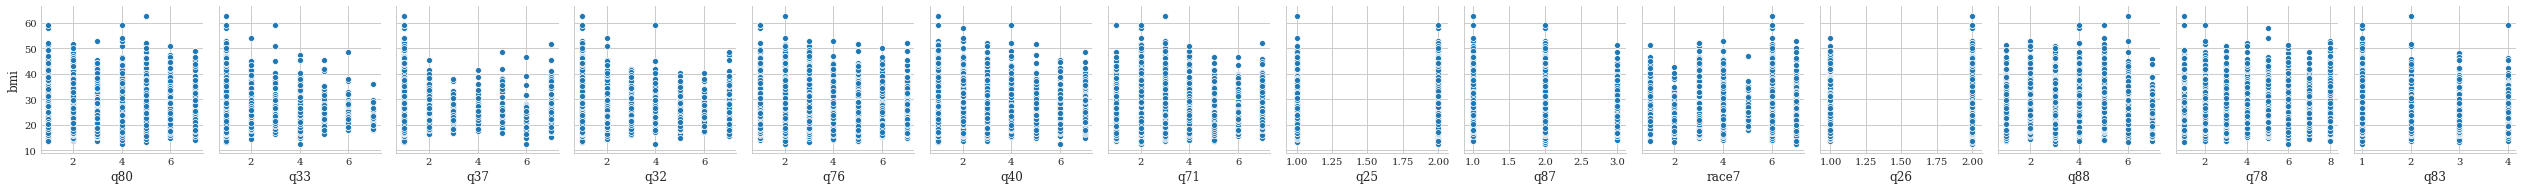

In [180]:
sns.pairplot(data=bmi_yrbs, y_vars=['bmi'], x_vars=["q80", "q33", "q37", "q32", "q76", "q40", "q71", "q25", "q87", "race7", "q26", "q88", "q78", "q83"])

In [181]:
bmi_yrbs.corr()

,sex,race7,bmi,qnobese,q23,q24,q25,q26,q32,q33,q35,q36,q37,q38,q40,q42,q48,q49,q50,q51,q52,q53,q70,q71,q72,q73,q74,q75,q76,q77,q78,q80,q81,q82,q83,q87,q88
sex,1.000000,0.011196,0.024494,-0.079424,0.100542,0.167313,0.195078,0.140882,0.009409,0.016212,0.063854,0.014129,0.155173,0.073102,-0.023909,-0.009246,0.011673,0.027783,-0.008774,0.028991,0.019790,0.028111,0.104237,-0.011215,-0.052943,0.055583,0.018598,-0.021046,0.104871,0.226934,0.064416,-0.016192,0.056198,0.110313,0.077370,-0.015296,0.054434
race7,0.011196,1.000000,-0.063598,0.042100,-0.037713,-0.040503,0.015457,-0.000414,0.029544,0.032923,0.045601,0.045379,0.035063,0.016370,0.075933,0.044115,-0.027233,0.004764,-0.001592,-0.008812,-0.009167,0.001357,-0.086425,0.013651,0.035507,0.037726,0.031861,0.053564,-0.017151,0.103483,0.079365,-0.034805,-0.018508,-0.001657,0.067474,0.001015,0.061153
bmi,0.024494,-0.063598,1.000000,-0.775794,-0.033332,-0.003274,-0.050346,-0.068646,0.054396,0.061429,0.019657,0.015945,0.059498,0.042955,0.048390,0.039410,0.043248,0.010515,0.012647,-0.000267,0.009766,0.010740,0.020249,-0.049676,-0.000655,0.011208,-0.032601,-0.026160,0.049087,-0.028458,-0.108078,0.072116,0.028907,-0.040367,-0.117623,-0.052193,-0.070494
qnobese,-0.079424,0.042100,-0.775794,1.000000,0.041565,0.000667,0.032646,0.053276,-0.036965,-0.039887,-0.001161,0.000432,-0.043632,-0.025433,-0.000852,-0.002705,-0.012656,-0.005306,-0.008669,0.004771,0.003146,0.001803,-0.026839,0.039349,0.000239,-0.009238,0.020590,0.013200,-0.050394,0.006731,0.071513,-0.054745,-0.045774,0.021375,0.111011,0.031790,0.050549
q23,0.100542,-0.037713,-0.033332,0.041565,1.000000,0.498427,0.279073,0.283460,-0.074791,-0.082446,-0.081894,-0.090615,0.002900,-0.051075,-0.085596,-0.076569,-0.051588,-0.052007,-0.099244,-0.039224,-0.046548,-0.055247,-0.013634,0.005593,-0.021089,-0.026503,-0.008232,-0.017847,-0.055289,0.002677,0.059346,-0.030063,-0.042752,0.025427,0.039470,0.024618,0.089678
q24,0.167313,-0.040503,-0.003274,0.000667,0.498427,1.000000,0.280042,0.282759,-0.122948,-0.128573,-0.121289,-0.134020,-0.002046,-0.081150,-0.145867,-0.131487,-0.096771,-0.072842,-0.110701,-0.048739,-0.064260,-0.077598,-0.007570,0.008472,-0.022763,-0.022268,0.007847,0.007983,-0.071751,0.036495,0.085477,-0.035040,-0.037512,0.028822,0.020116,0.034016,0.109854
q25,0.195078,0.015457,-0.050346,0.032646,0.279073,0.280042,1.000000,0.500262,-0.141523,-0.146182,-0.092871,-0.112357,-0.010532,-0.075433,-0.188079,-0.150797,-0.152129,-0.072564,-0.114045,-0.039616,-0.061636,-0.086517,0.011868,0.029382,-0.002161,0.006887,0.020052,0.002148,-0.057291,0.078101,0.176731,-0.005894,-0.083998,0.074923,0.135727,0.054367,0.218458
q26,0.140882,-0.000414,-0.068646,0.053276,0.283460,0.282759,0.500262,1.000000,-0.178401,-0.178706,-0.111462,-0.126210,-0.024664,-0.108266,-0.196550,-0.169133,-0.159219,-0.108125,-0.159458,-0.068501,-0.097062,-0.115853,0.022678,0.050327,0.006949,-0.007933,0.009557,0.005063,-0.073854,0.047115,0.148624,-0.002584,-0.077574,0.062663,0.108567,0.048412,0.190994
q32,0.009409,0.029544,0.054396,-0.036965,-0.074791,-0.122948,-0.141523,-0.178401,1.000000,0.912497,0.396130,0.362546,0.302239,0.517469,0.376484,0.446684,0.479792,0.324687,0.214237,0.209192,0.283983,0.314440,0.036540,-0.017511,0.018995,0.061547,-0.006816,-0.005865,0.181492,0.001459,-0.095432,0.044168,0.000287,-0.040929,-0.088917,-0.032151,-0.088169
q33,0.016212,0.032923,0.061429,-0.039887,-0.082446,-0.128573,-0.146182,-0.178706,0.912497,1.000000,0.421711,0.372638,0.330706,0.519636,0.398707,0.466749,0.455548,0.327074,0.238277,0.218884,0.295900,0.314591,0.033867,-0.024755,0.022813,0.062741,-0.006890,-0.009717,0.184750,0.001030,-0.099756,0.051674,0.001122,-0.038643,-0.079839,-0.029176,-0.091509


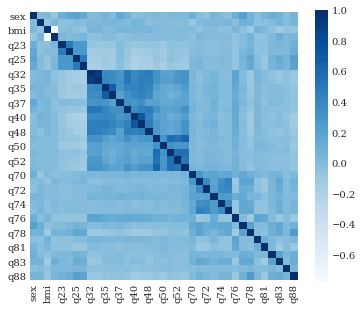

In [182]:
corrmat = bmi_yrbs.corr()
sns.heatmap(corrmat, square = True, cmap="Blues")

After examining the correlations I decided to drop variables with little correlation to BMI. I set my cutoff ~.05 correlation which left the following variables:
* bmi - 1
* q80 - 0.072116
* q33 - 0.061429
* q37 - 0.059498
* q32 - 0.054396
* q76 - 0.049087
* q40 - 0.04839
* q71 - -0.04968
* q25 - -0.05035
* q87 - -0.05219
* race7 - -0.0636
* q26 - -0.06865
* q88 - -0.07049
* q78 - -0.10808
* q83 - -0.11762

In [183]:
bmi_yrbs = bmi_yrbs[["bmi", "q80", "q33", "q37", "q32", "q76", "q40", "q71", "q25", "q87", "race7", "q26", "q88", "q78", "q83"]]
bmi_yrbs.head()

,bmi,q80,q33,q37,q32,q76,q40,q71,q25,q87,race7,q26,q88,q78,q83
419937,19.328368,1,4,1,6,6,2,2,1,1,7,2,3,5,2
419938,26.309982,4,1,1,1,2,1,5,2,1,7,2,5,4,4
419940,22.148438,1,1,1,1,1,2,7,1,2,7,1,6,8,1
419941,28.723183,2,1,1,1,1,6,6,2,1,6,2,4,3,3
419943,18.402369,3,1,1,1,2,1,5,2,2,4,2,2,8,1


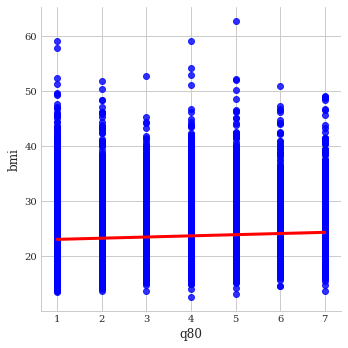

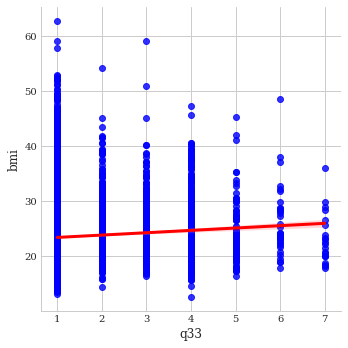

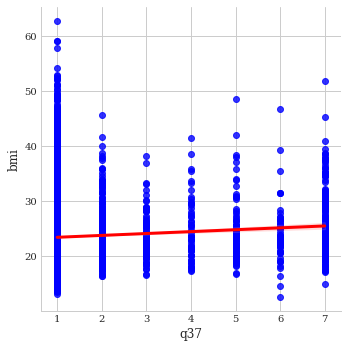

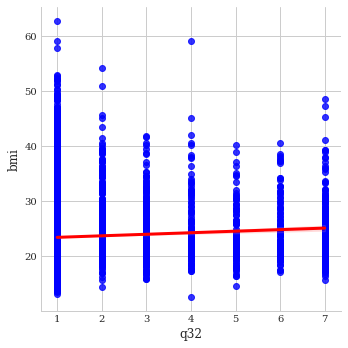

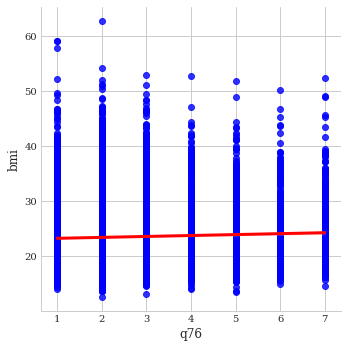

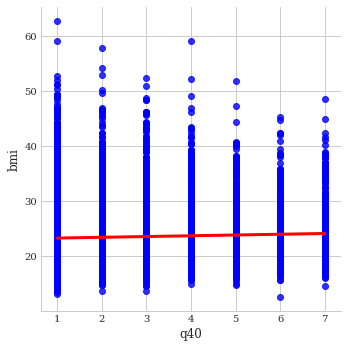

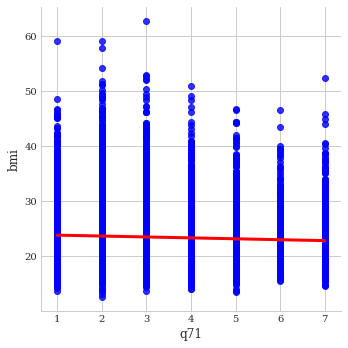

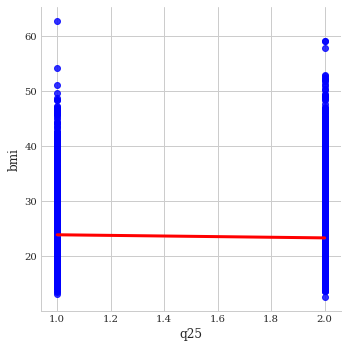

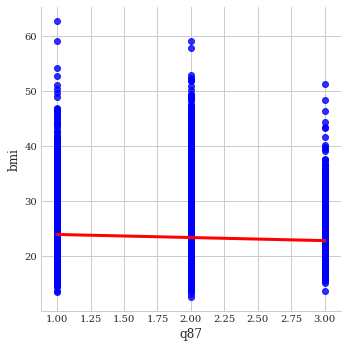

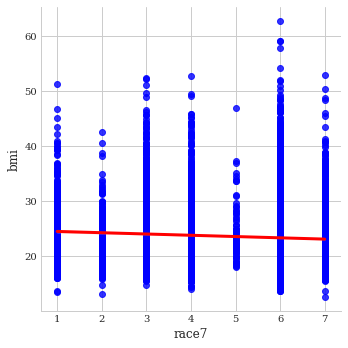

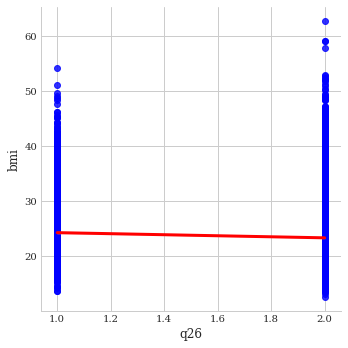

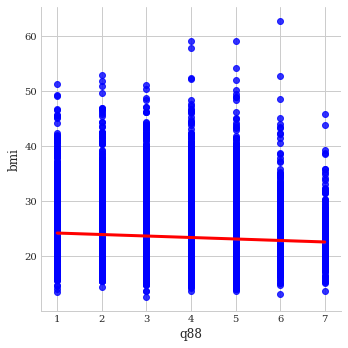

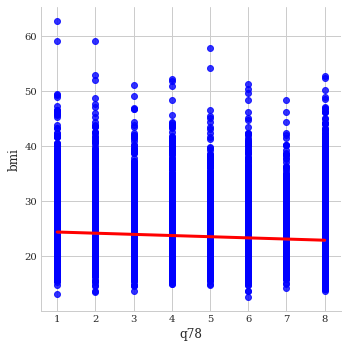

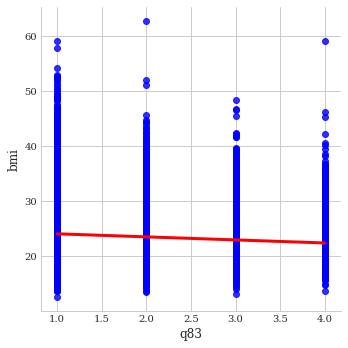

In [184]:
sns.lmplot(x="q80", y="bmi", data=bmi_yrbs, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})
sns.lmplot(x="q33", y="bmi", data=bmi_yrbs, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})
sns.lmplot(x="q37", y="bmi", data=bmi_yrbs, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})
sns.lmplot(x="q32", y="bmi", data=bmi_yrbs, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})
sns.lmplot(x="q76", y="bmi", data=bmi_yrbs, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})
sns.lmplot(x="q40", y="bmi", data=bmi_yrbs, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})
sns.lmplot(x="q71", y="bmi", data=bmi_yrbs, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})
sns.lmplot(x="q25", y="bmi", data=bmi_yrbs, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})
sns.lmplot(x="q87", y="bmi", data=bmi_yrbs, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})
sns.lmplot(x="race7", y="bmi", data=bmi_yrbs, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})
sns.lmplot(x="q26", y="bmi", data=bmi_yrbs, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})
sns.lmplot(x="q88", y="bmi", data=bmi_yrbs, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})
sns.lmplot(x="q78", y="bmi", data=bmi_yrbs, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})
sns.lmplot(x="q83", y="bmi", data=bmi_yrbs, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})

In [185]:
y=bmi_yrbs['bmi']
X=bmi_yrbs[["q80", "q33", "q37", "q32", "q76", "q40", "q71", "q25", "q87", "race7", "q26", "q88", "q78", "q83"]]
X=sm.add_constant(X)
model1 = sm.OLS(y, X) 
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bmi   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     38.96
Date:                Fri, 10 Jul 2020   Prob (F-statistic):          3.13e-105
Time:                        17:53:35   Log-Likelihood:                -42382.
No. Observations:               13967   AIC:                         8.479e+04
Df Residuals:                   13952   BIC:                         8.491e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.0671      0.365     74.170      0.000      26.352      27.782
q80            0.1899      0.025      7.582      0.000       0.141       0.239
q33            0.2715      0.143      1.895      0.058      -0.009       0.552
q37            0.2677      0.052      5.145      0.000       0.166       0.370
q32           -0.1326      0.104     -1.270      0.204      -0.337       0.072
q76            0.0157      0.030      0.523      0.601      -0.043       0.075
q40            0.0287      0.027      1.060      0.289      -0.024       0.082
q71           -0.0375      0.029     -1.307      0.191      -0.094       0.019
q25            0.0900      0.110      0.817      0.414      -0.126       0.306
q87           -0.4667      0.089     -5.238      0.000      -0.641      -0.292
race7         -0.1850      0.031     -6.057      0.000      -0.245      -0.125
q26           -0.5309      0.134     -3.970      0.000      -0.793      -0.269
q88           -0.0986      0.034     -2.906      0.004      -0.165      -0.032
q78           -0.1351      0.018     -7.706      0.000      -0.170      -0.101
q83           -0.4363      0.041    -10.743      0.000      -0.516      -0.357
==============================================================================
Omnibus:                     3968.139   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12150.925
Skew:                           1.466   Prob(JB):                         0.00
Kurtosis:                       6.504   Cond. No.                         96.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
predictions1=results1.predict(X)
predictions1.head()

419937    23.314203
419938    22.683598
419940    22.696007
419941    23.249445
419943    23.646361
dtype: float64

In [187]:
bmi_yrbs['predicted_bmi']=predictions1

/Users/shaneregel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


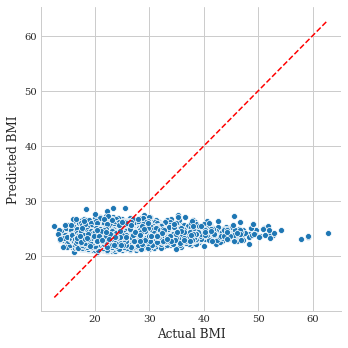

In [188]:
g=sns.relplot(x="bmi", y="predicted_bmi", data=bmi_yrbs) #store the plot in "g"
g.set(xlabel="Actual BMI", ylabel="Predicted BMI") #set lables for axes
mn = min(bmi_yrbs.bmi.min(), bmi_yrbs.predicted_bmi.min()) #generate min coordinates for line
mx = max(bmi_yrbs.bmi.max(), bmi_yrbs.predicted_bmi.max()) #generate max coordinates for line
points = np.linspace(mn, mx, 100) #generate points of the line
plt.plot(points, points, color='r', linestyle='--', linewidth=1.5) #add the line to the plot
plt.show() #show the full plot
#plt.gca().plot(points, points, color='r', linestyle='--', linewidth=1.5) #also works

In [189]:
sm.tools.eval_measures.rmse(bmi_yrbs.bmi, bmi_yrbs.predicted_bmi, axis=0)

5.030566393782885

Doctors give the following ranges for BMI:
* less than 18.5 Underweight
* 18.5 - 24.9 Normal/Healthy
* 25 - 29.9 Overweight
* greater than 30 Obese

Having our RMSE around 5 when the category ranges are 5-6 is not a very encouraging result. Since the results are not particularly good so lets drop some of the lower correlated varibales and see if the predictive power increases.

In [190]:
bmi_yrbs = bmi_yrbs.drop(columns=["q76", "q40", "q71", "predicted_bmi"])
bmi_yrbs.head()

,bmi,q80,q33,q37,q32,q25,q87,race7,q26,q88,q78,q83
419937,19.328368,1,4,1,6,1,1,7,2,3,5,2
419938,26.309982,4,1,1,1,2,1,7,2,5,4,4
419940,22.148438,1,1,1,1,1,2,7,1,6,8,1
419941,28.723183,2,1,1,1,2,1,6,2,4,3,3
419943,18.402369,3,1,1,1,2,2,4,2,2,8,1


In [191]:
y=bmi_yrbs['bmi']
X=bmi_yrbs[["q80", "q33", "q37", "q32", "q25", "q87", "race7", "q26", "q88", "q78", "q83"]]
X=sm.add_constant(X)
model1 = sm.OLS(y, X) 
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bmi   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     49.29
Date:                Fri, 10 Jul 2020   Prob (F-statistic):          4.58e-107
Time:                        17:54:02   Log-Likelihood:                -42384.
No. Observations:               13967   AIC:                         8.479e+04
Df Residuals:                   13955   BIC:                         8.488e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.0911      0.348     77.941      0.000      26.410      27.772
q80            0.1940      0.025      7.885      0.000       0.146       0.242
q33            0.2932      0.142      2.061      0.039       0.014       0.572
q37            0.2805      0.051      5.519      0.000       0.181       0.380
q32           -0.1305      0.104     -1.251      0.211      -0.335       0.074
q25            0.0853      0.110      0.778      0.437      -0.130       0.300
q87           -0.4690      0.089     -5.267      0.000      -0.644      -0.294
race7         -0.1822      0.030     -5.983      0.000      -0.242      -0.123
q26           -0.5471      0.133     -4.106      0.000      -0.808      -0.286
q88           -0.1031      0.034     -3.050      0.002      -0.169      -0.037
q78           -0.1404      0.017     -8.136      0.000      -0.174      -0.107
q83           -0.4427      0.040    -11.042      0.000      -0.521      -0.364
==============================================================================
Omnibus:                     3965.155   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12127.929
Skew:                           1.466   Prob(JB):                         0.00
Kurtosis:                       6.499   Cond. No.                         84.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared value is actually 0.001 lower than the previous pass which indicates lowering the number of variables is not increasing their predictive value. I decided to try and drop a few more variables and see if that matters

In [192]:
bmi_yrbs = bmi_yrbs.drop(columns=["q37", "q32", "q25", "q87"])
bmi_yrbs.head()

,bmi,q80,q33,race7,q26,q88,q78,q83
419937,19.328368,1,4,7,2,3,5,2
419938,26.309982,4,1,7,2,5,4,4
419940,22.148438,1,1,7,1,6,8,1
419941,28.723183,2,1,6,2,4,3,3
419943,18.402369,3,1,4,2,2,8,1


In [193]:
y=bmi_yrbs['bmi']
X=bmi_yrbs[["q80", "q33", "race7", "q26", "q88", "q78", "q83"]]
X=sm.add_constant(X)
model1 = sm.OLS(y, X) 
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bmi   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     68.43
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           1.31e-97
Time:                        17:54:07   Log-Likelihood:                -42415.
No. Observations:               13967   AIC:                         8.485e+04
Df Residuals:                   13959   BIC:                         8.491e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.4800      0.310     85.532      0.000      25.873      27.087
q80            0.1972      0.025      8.001      0.000       0.149       0.246
q33            0.2494      0.059      4.226      0.000       0.134       0.365
race7         -0.1776      0.031     -5.820      0.000      -0.237      -0.118
q26           -0.4905      0.119     -4.137      0.000      -0.723      -0.258
q88           -0.1129      0.034     -3.358      0.001      -0.179      -0.047
q78           -0.1420      0.017     -8.238      0.000      -0.176      -0.108
q83           -0.4272      0.040    -10.674      0.000      -0.506      -0.349
==============================================================================
Omnibus:                     3972.519   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12143.846
Skew:                           1.469   Prob(JB):                         0.00
Kurtosis:                       6.498   Cond. No.                         72.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared value has decreased again. It seems that limiting the number of variables is not helping with predictions.

<a id='section_id2'></a>
# Idea 2 - Drug use

In [248]:
drug_yrbs = yrbs[["age", "sex", "race7", "q15", "q16", "q17", "q19", "q21", "q22", "q23", "q24", "q25", "q26", "q27", "q28", "q30", "q31", "q32", "q33", "q34", "q35", "q37", "q38", "q40", "q41", "q42", "q44", "q45", "q46", "q47", "q48", "q49", "q50", "q51", "q52", "q53", "q54", "q55", "q56", "q57", "q58", "q59", "q60", "q61", "q62", "q63", "q67", "q68", "q80", "q82", "q83", "q88", "q89"]]
drug_yrbs.head()

,age,sex,race7,q15,q16,q17,q19,q21,q22,q23,q24,q25,q26,q27,q28,q30,q31,q32,q33,q34,q35,q37,q38,q40,q41,q42,q44,q45,q46,q47,q48,q49,q50,q51,q52,q53,q54,q55,q56,q57,q58,q59,q60,q61,q62,q63,q67,q68,q80,q82,q83,q88,q89
0,7,1,6,1,1,1,2,NaN,NaN,NaN,NaN,1,2,2,1,1,NaN,1,1,NaN,NaN,NaN,1,3,7,2,NaN,NaN,1,1,1,1,1,1,1,1,NaN,1,NaN,1,2,1,8,3,4,3,NaN,3,3,6,3,NaN,NaN
1,7,1,6,1,1,1,2,NaN,NaN,NaN,NaN,2,2,2,1,1,NaN,1,1,NaN,NaN,NaN,1,2,1,1,NaN,NaN,1,1,1,1,1,1,1,1,NaN,1,NaN,1,2,1,8,2,2,3,NaN,4,4,6,1,NaN,NaN
2,7,1,7,3,2,NaN,2,NaN,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN,3,2,NaN,NaN,NaN,2,3,3,NaN,NaN,NaN,NaN,3,NaN,NaN,2,3,2,1,NaN,4,NaN,2,1,NaN,2,4,4,2,NaN,3,2,1,2,NaN,NaN
3,7,1,6,1,1,1,2,NaN,NaN,NaN,NaN,2,2,2,1,1,NaN,7,3,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,1,1,1,1,1,1,1,1,NaN,1,NaN,1,2,1,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,1,6,1,1,1,1,NaN,NaN,NaN,NaN,2,2,2,1,1,NaN,1,1,NaN,NaN,NaN,1,7,2,3,NaN,NaN,7,3,4,2,2,1,1,1,NaN,1,NaN,1,2,1,6,4,3,2,NaN,3,2,1,1,NaN,NaN


In [249]:
drug_yrbs.tail()

,age,sex,race7,q15,q16,q17,q19,q21,q22,q23,q24,q25,q26,q27,q28,q30,q31,q32,q33,q34,q35,q37,q38,q40,q41,q42,q44,q45,q46,q47,q48,q49,q50,q51,q52,q53,q54,q55,q56,q57,q58,q59,q60,q61,q62,q63,q67,q68,q80,q82,q83,q88,q89
962920,7,1,6,1,1,1,2,2,2,2,2,2,2,2,1,2,1,1,1,2,1,1,1,2,6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,4,3,4,1,2,5,2
962921,7,1,6,1,1,1,2,2,2,2,2,2,2,2,1,2,1,1,1,2,1,1,1,5,6,4,5,8,4,7,2,1,1,1,1,1,1,1,1,1,1,1,8,5,3,3,1,3,4,1,2,4,1
962922,7,1,4,1,1,1,2,NaN,NaN,2,2,NaN,2,2,1,2,1,1,1,2,1,1,1,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1,3,4,1,1,4,2
962923,7,1,6,1,1,1,2,2,2,2,2,1,2,2,1,2,1,1,1,2,1,1,1,3,6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,8,2,3,3,1,2,3,1,2,2,1
962924,7,1,6,1,1,1,2,2,2,2,2,2,2,2,1,2,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,7,3,2,3,1,3,6,1,2,4,1


In [250]:
drug_yrbs = drug_yrbs.apply(pd.to_numeric)
drug_yrbs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962925 entries, 0 to 962924
Data columns (total 53 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   age     959611 non-null  float64
 1   sex     957244 non-null  float64
 2   race7   938981 non-null  float64
 3   q15     914767 non-null  float64
 4   q16     867801 non-null  float64
 5   q17     896886 non-null  float64
 6   q19     669129 non-null  float64
 7   q21     223097 non-null  float64
 8   q22     298172 non-null  float64
 9   q23     488442 non-null  float64
 10  q24     404614 non-null  float64
 11  q25     784984 non-null  float64
 12  q26     937582 non-null  float64
 13  q27     830280 non-null  float64
 14  q28     819193 non-null  float64
 15  q30     773282 non-null  float64
 16  q31     77588 non-null   float64
 17  q32     914306 non-null  float64
 18  q33     809554 non-null  float64
 19  q34     150201 non-null  float64
 20  q35     200988 non-null  float64
 21  q37     77

In [251]:
drug_yrbs.tail()

,age,sex,race7,q15,q16,q17,q19,q21,q22,q23,q24,q25,q26,q27,q28,q30,q31,q32,q33,q34,q35,q37,q38,q40,q41,q42,q44,q45,q46,q47,q48,q49,q50,q51,q52,q53,q54,q55,q56,q57,q58,q59,q60,q61,q62,q63,q67,q68,q80,q82,q83,q88,q89
962920,7.0,1.0,6.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,4.0,3.0,4.0,1.0,2.0,5.0,2.0
962921,7.0,1.0,6.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,5.0,6.0,4.0,5.0,8.0,4.0,7.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,5.0,3.0,3.0,1.0,3.0,4.0,1.0,2.0,4.0,1.0
962922,7.0,1.0,4.0,1.0,1.0,1.0,2.0,NaN,NaN,2.0,2.0,NaN,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,4.0,1.0,1.0,4.0,2.0
962923,7.0,1.0,6.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,8.0,2.0,3.0,3.0,1.0,2.0,3.0,1.0,2.0,2.0,1.0
962924,7.0,1.0,6.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,7.0,3.0,2.0,3.0,1.0,3.0,6.0,1.0,2.0,4.0,1.0


In [252]:
drug_yrbs.dropna(inplace=True)
drug_yrbs.shape

(5835, 53)

In [253]:
drug_yrbs.tail()

,age,sex,race7,q15,q16,q17,q19,q21,q22,q23,q24,q25,q26,q27,q28,q30,q31,q32,q33,q34,q35,q37,q38,q40,q41,q42,q44,q45,q46,q47,q48,q49,q50,q51,q52,q53,q54,q55,q56,q57,q58,q59,q60,q61,q62,q63,q67,q68,q80,q82,q83,q88,q89
962918,7.0,1.0,6.0,1.0,1.0,1.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,7.0,1.0,1.0,1.0,3.0,1.0,3.0,6.0,6.0,2.0,1.0,2.0,5.0,6.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,3.0,1.0
962920,7.0,1.0,6.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,4.0,3.0,4.0,1.0,2.0,5.0,2.0
962921,7.0,1.0,6.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,5.0,6.0,4.0,5.0,8.0,4.0,7.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,5.0,3.0,3.0,1.0,3.0,4.0,1.0,2.0,4.0,1.0
962923,7.0,1.0,6.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,8.0,2.0,3.0,3.0,1.0,2.0,3.0,1.0,2.0,2.0,1.0
962924,7.0,1.0,6.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,7.0,3.0,2.0,3.0,1.0,3.0,6.0,1.0,2.0,4.0,1.0


In [254]:
drug_yrbs.corr()

,age,sex,race7,q15,q16,q17,q19,q21,q22,q23,q24,q25,q26,q27,q28,q30,q31,q32,q33,q34,q35,q37,q38,q40,q41,q42,q44,q45,q46,q47,q48,q49,q50,q51,q52,q53,q54,q55,q56,q57,q58,q59,q60,q61,q62,q63,q67,q68,q80,q82,q83,q88,q89
age,1.000000,0.028407,0.007771,-0.014683,-0.031742,-0.037943,-0.054947,0.097450,0.110008,0.081776,0.046008,-0.015109,0.012698,0.012048,-0.019309,-0.148054,0.183947,0.105027,0.105454,-0.160634,0.102223,0.082579,0.096010,0.224116,0.278599,0.161944,0.134324,0.162715,0.206158,0.243863,0.123432,0.043771,-0.008152,0.004901,0.029611,0.036365,0.053098,0.012518,0.086636,-0.016547,-0.011455,-0.277868,0.330002,0.253149,0.258469,0.271400,-0.020248,0.013546,-0.037697,-0.176883,-0.079701,-0.118532,-0.013202
sex,0.028407,1.000000,0.011629,-0.015408,0.041606,0.130961,0.127728,-0.089721,-0.038174,0.062120,0.142189,0.190490,0.130780,0.094009,-0.072539,-0.030291,0.025564,0.050567,0.050983,-0.045802,0.090838,0.161086,0.092857,0.002207,-0.070730,0.012336,0.038814,0.036942,0.017948,-0.015710,0.017413,0.058156,0.005069,0.056283,0.048621,0.046359,0.031536,0.048197,0.024226,0.048172,-0.022898,-0.017178,0.004932,0.030010,0.012763,0.013940,-0.136536,-0.139397,0.003105,0.102172,0.062381,0.065335,0.157004
race7,0.007771,0.011629,1.000000,-0.019479,-0.001849,-0.014105,0.002715,0.039572,0.036801,-0.029190,-0.049976,0.000185,-0.013269,0.005510,-0.016654,-0.032372,0.042305,0.052231,0.054945,-0.051489,0.042295,0.067691,0.017568,0.065716,0.052310,0.042593,0.032493,0.037494,-0.029361,-0.016572,-0.026871,0.014356,0.006298,0.011519,0.011172,0.004609,-0.001394,0.008488,-0.000551,-0.004760,0.005016,-0.003276,0.014732,-0.014668,0.003373,0.002583,-0.022719,-0.006855,-0.032990,0.015414,0.081776,0.053604,-0.086221
q15,-0.014683,-0.015408,-0.019479,1.000000,0.304003,0.212531,-0.157237,0.153995,0.182191,-0.176993,-0.201912,-0.169289,-0.177884,-0.169906,0.181859,-0.113210,0.079468,0.137160,0.152873,-0.078839,0.147140,0.104922,0.160050,0.110277,0.039305,0.167040,0.161129,0.119882,0.117935,0.071517,0.145146,0.242789,0.193432,0.223115,0.184351,0.226774,0.211543,0.182329,0.150575,0.217678,-0.086706,-0.095917,0.057405,0.125255,0.144878,0.077478,0.073927,0.032162,0.025529,0.009353,-0.015485,-0.087081,0.102004
q16,-0.031742,0.041606,-0.001849,0.304003,1.000000,0.273114,-0.098778,0.133980,0.176908,-0.196310,-0.189134,-0.113132,-0.128059,-0.117970,0.151145,-0.093282,0.063764,0.137508,0.162751,-0.079360,0.166281,0.122960,0.169173,0.133504,0.017153,0.168347,0.160849,0.126660,0.124047,0.070072,0.143985,0.251993,0.244236,0.246885,0.224854,0.277192,0.216023,0.210911,0.184310,0.215575,-0.122337,-0.082842,0.029953,0.133670,0.150681,0.049789,0.054852,-0.007928,0.016824,-0.006619,0.017957,-0.079685,0.073031
q17,-0.037943,0.130961,-0.014105,0.212531,0.273114,1.000000,-0.110408,0.167742,0.228190,-0.139147,-0.130003,-0.118984,-0.149613,-0.146727,0.178655,-0.227432,0.173751,0.263666,0.276041,-0.196254,0.237458,0.242324,0.293698,0.276992,0.105132,0.306760,0.295106,0.293301,0.259009,0.148315,0.261192,0.274054,0.218265,0.201358,0.223371,0.257019,0.256073,0.232609,0.283465,0.224525,-0.158052,-0.198963,0.118731,0.255799,0.240547,0.166530,0.051719,0.018383,0.023459,0.060343,0.031644,-0.080241,0.141966
q19,-0.054947,0.127728,0.002715,-0.157237,-0.098778,-0.110408,1.000000,-0.246297,-0.222106,0.144240,0.208319,0.188258,0.239841,0.199658,-0.204614,0.190765,-0.151884,-0.139842,-0.150530,0.138214,-0.113989,-0.016938,-0.095495,-0.180135,-0.092011,-0.168664,-0.153971,-0.156469,-0.198143,-0.167366,-0.144559,-0.114982,-0.091657,-0.063414,-0.069496,-0.110479,-0.103372,-0.081062,-0.140796,-0.078978,0.091056,0.234515,-0.167229,-0.268308,-0.236219,-0.215861,-0.113714,-0.051465,-0.005958,0.027611,0.068561,0.077126,-0.046557
q21,0.097450,-0.089721,0.039572,0.153995,0.133980,0.167742,-0.246297,1.000000,0.772230,-0.100695,-0.180967,-0.178096,-0.185766,-0.149191,0.173196,-0.190412,0.164483,0.127917,0.149933,-0.187184,0.134735,0.093903,0.135896,0.255196,0.204954,0.205249,0.179243,0.183907,0.209887,0.198645,0

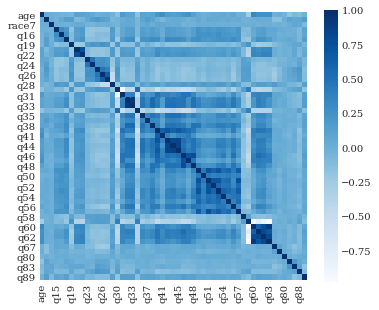

In [255]:
corrmat = drug_yrbs.corr()
sns.heatmap(corrmat, square = True, cmap="Blues")

Since the focus for this hypothesis was the extent smoking, both cigarettes and marijuana, and drinking can act as a gateway to harder drug use I will limit the fields down to those associated with cigarette and marijuana smoking.

In [256]:
drug_yrbs = yrbs[["q30", "q31", "q32", "q33", "q34", "q35", "q37", "q38", "q40", "q41", "q42", "q44", "q45", "q46", "q47", "q48", "q49", "q50", "q51", "q52", "q53", "q54"]]
drug_yrbs.head()

,q30,q31,q32,q33,q34,q35,q37,q38,q40,q41,q42,q44,q45,q46,q47,q48,q49,q50,q51,q52,q53,q54
0,1,NaN,1,1,NaN,NaN,NaN,1,3,7,2,NaN,NaN,1,1,1,1,1,1,1,1,NaN
1,1,NaN,1,1,NaN,NaN,NaN,1,2,1,1,NaN,NaN,1,1,1,1,1,1,1,1,NaN
2,NaN,NaN,3,2,NaN,NaN,NaN,2,3,3,NaN,NaN,NaN,NaN,3,NaN,NaN,2,3,2,1,NaN
3,1,NaN,7,3,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,1,1,1,1,1,1,1,1,NaN
4,1,NaN,1,1,NaN,NaN,NaN,1,7,2,3,NaN,NaN,7,3,4,2,2,1,1,1,NaN


In [257]:
drug_yrbs.dropna(inplace=True)

/Users/shaneregel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [258]:
drug_yrbs = drug_yrbs.apply(pd.to_numeric)
drug_yrbs.corr()

,q30,q31,q32,q33,q34,q35,q37,q38,q40,q41,q42,q44,q45,q46,q47,q48,q49,q50,q51,q52,q53,q54
q30,1.000000,-0.924873,-0.433410,-0.458637,0.526634,-0.372984,-0.260130,-0.319936,-0.533382,-0.356589,-0.421480,-0.383812,-0.429956,-0.538276,-0.477256,-0.392322,-0.198502,-0.187871,-0.103157,-0.148502,-0.187369,-0.253036
q31,-0.924873,1.000000,0.362992,0.389454,-0.494965,0.341046,0.217020,0.267625,0.492154,0.380805,0.381999,0.336914,0.394358,0.488254,0.482464,0.347863,0.124828,0.111780,0.038001,0.078160,0.129014,0.176803
q32,-0.433410,0.362992,1.000000,0.919640,-0.302106,0.440290,0.329807,0.549425,0.401127,0.161739,0.483141,0.490713,0.448536,0.472961,0.269496,0.488323,0.393357,0.263494,0.275648,0.334397,0.363887,0.379117
q33,-0.458637,0.389454,0.919640,1.000000,-0.315502,0.461403,0.366024,0.561727,0.420048,0.167358,0.505415,0.512984,0.466224,0.467868,0.277884,0.475481,0.424726,0.301155,0.319123,0.375387,0.390768,0.400202
q34,0.526634,-0.494965,-0.302106,-0.315502,1.000000,-0.428059,-0.220997,-0.280637,-0.544835,-0.420706,-0.414976,-0.365050,-0.423404,-0.512214,-0.506768,-0.365782,-0.156796,-0.137965,-0.090887,-0.115020,-0.174140,-0.221753
q35,-0.372984,0.341046,0.440290,0.461403,-0.428059,1.000000,0.340028,0.470229,0.450032,0.210116,0.523217,0.526690,0.507640,0.463733,0.324925,0.446777,0.306528,0.213887,0.223725,0.255985,0.332438,0.335012
q37,-0.260130,0.217020,0.329807,0.366024,-0.220997,0.340028,1.000000,0.388387,0.314187,0.117046,0.391120,0.408106,0.379173,0.256197,0.166517,0.236041,0.285328,0.198654,0.221474,0.256977,0.256260,0.258863
q38,-0.319936,0.267625,0.549425,0.561727,-0.280637,0.470229,0.388387,1.000000,0.382595,0.139906,0.490436,0.506664,0.450337,0.434228,0.247545,0.486973,0.407391,0.262743,0.329605,0.332929,0.400039,0.392337
q40,-0.533382,0.492154,0.401127,0.420048,-0.544835,0.450032,0.314187,0.382595,1.000000,0.627412,0.727684,0.626433,0.700572,0.619617,0.546877,0.465835,0.252885,0.207806,0.151972,0.193408,0.256150,0.309140
q41,-0.356589,0.380805,0.161739,0.167358,-0.420706,0.210116,0.117046,0.139906,0.627412,1.000000,0.377454,0.258941,0.373702,0.377369,0.460994,0.251920,0.054177,0.056879,0.008686,0.029037,0.056389,0.095083


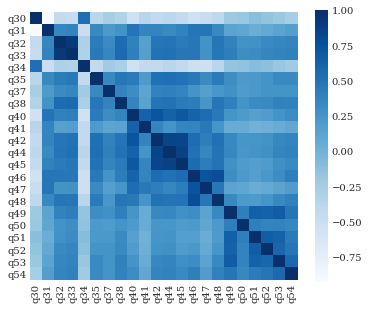

In [259]:
corrmat = drug_yrbs.corr()
sns.heatmap(corrmat, square = True, cmap="Blues")

q34 which asks is a student ever used an electronic vapor product is a clear outlier in that it is not very correlated to anything other than q30 which asks if a student ever has tried a cigarette. Therefore I am dropping both.

In [262]:
drug_yrbs = yrbs[["q31", "q32", "q33", "q35", "q37", "q38", "q40", "q41", "q42", "q44", "q45", "q46", "q47", "q48", "q49", "q50", "q51", "q52", "q53", "q54"]]
drug_yrbs.dropna(inplace=True)
drug_yrbs = drug_yrbs.apply(pd.to_numeric)
drug_yrbs.head()

/Users/shaneregel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,q31,q32,q33,q35,q37,q38,q40,q41,q42,q44,q45,q46,q47,q48,q49,q50,q51,q52,q53,q54
419919,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
419937,5,6,4,1,1,6,2,4,1,1,1,7,5,6,1,1,1,1,1,2
419938,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
419939,4,5,2,7,1,2,7,4,5,6,5,6,3,4,2,1,1,1,1,2
419940,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1


In [263]:
drug_yrbs = drug_yrbs.apply(pd.to_numeric)
drug_yrbs.corr()

,q31,q32,q33,q35,q37,q38,q40,q41,q42,q44,q45,q46,q47,q48,q49,q50,q51,q52,q53,q54
q31,1.000000,0.362656,0.388835,0.339745,0.215579,0.268196,0.490729,0.379926,0.380449,0.336314,0.393903,0.486071,0.480385,0.346754,0.123149,0.111197,0.037090,0.078165,0.128544,0.176516
q32,0.362656,1.000000,0.920000,0.438842,0.331198,0.551139,0.401493,0.161567,0.483342,0.492053,0.448422,0.472292,0.269330,0.487716,0.392619,0.266086,0.274731,0.336289,0.364024,0.380153
q33,0.388835,0.920000,1.000000,0.459556,0.366536,0.562378,0.420243,0.167125,0.505341,0.514353,0.466008,0.467144,0.277314,0.474941,0.424646,0.304201,0.318801,0.377600,0.391691,0.402085
q35,0.339745,0.438842,0.459556,1.000000,0.342427,0.469446,0.449139,0.210065,0.522800,0.526577,0.507869,0.461567,0.324471,0.444114,0.305621,0.215467,0.223843,0.257439,0.333161,0.335154
q37,0.215579,0.331198,0.366536,0.342427,1.000000,0.390735,0.315356,0.117641,0.392951,0.409279,0.379949,0.255876,0.167652,0.234621,0.285664,0.200048,0.222535,0.258684,0.258140,0.259706
q38,0.268196,0.551139,0.562378,0.469446,0.390735,1.000000,0.383286,0.139404,0.492776,0.508824,0.450810,0.432325,0.246563,0.484305,0.404840,0.264217,0.327737,0.335218,0.399673,0.391840
q40,0.490729,0.401493,0.420243,0.449139,0.315356,0.383286,1.000000,0.626974,0.728235,0.627423,0.701138,0.618153,0.546491,0.464082,0.252346,0.209324,0.151327,0.194370,0.257070,0.309996
q41,0.379926,0.161567,0.167125,0.210065,0.117641,0.139404,0.626974,1.000000,0.376596,0.258421,0.373560,0.376977,0.461217,0.251764,0.053037,0.057034,0.007408,0.028354,0.055700,0.094744
q42,0.380449,0.483342,0.505341,0.522800,0.392951,0.492776,0.728235,0.376596,1.000000,0.855835,0.849484,0.541763,0.423700,0.508947,0.340350,0.245298,0.250502,0.265338,0.361788,0.376683
q44,0.336314,0.492053,0.514353,0.526577,0.409279,0.508824,0.627423,0.258421,0.855835,1.000000,0.874128,0.512163,0.365909,0.494552,0.358996,0.240567,0.258122,0.285697,0.381919,0.395417


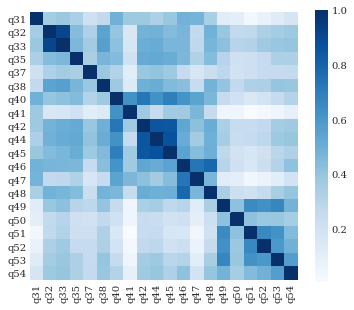

In [264]:
corrmat = drug_yrbs.corr()
sns.heatmap(corrmat, square = True, cmap="Blues")

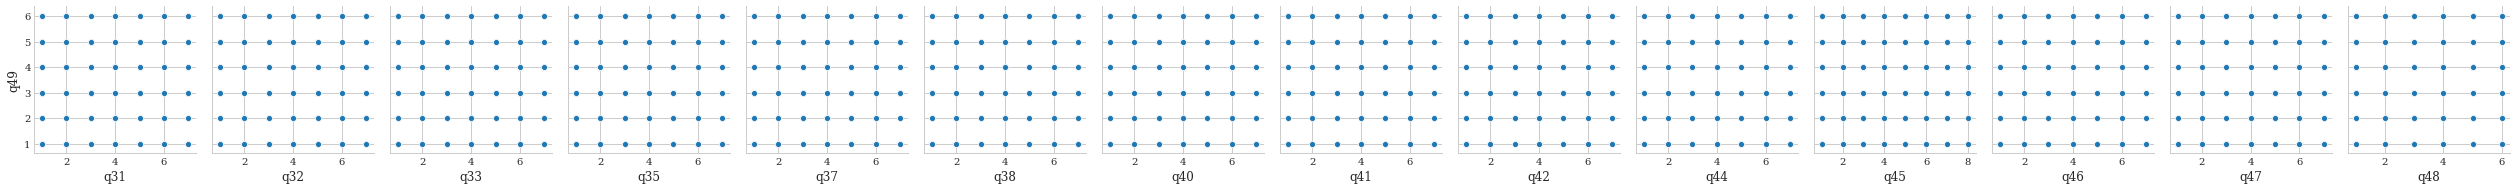

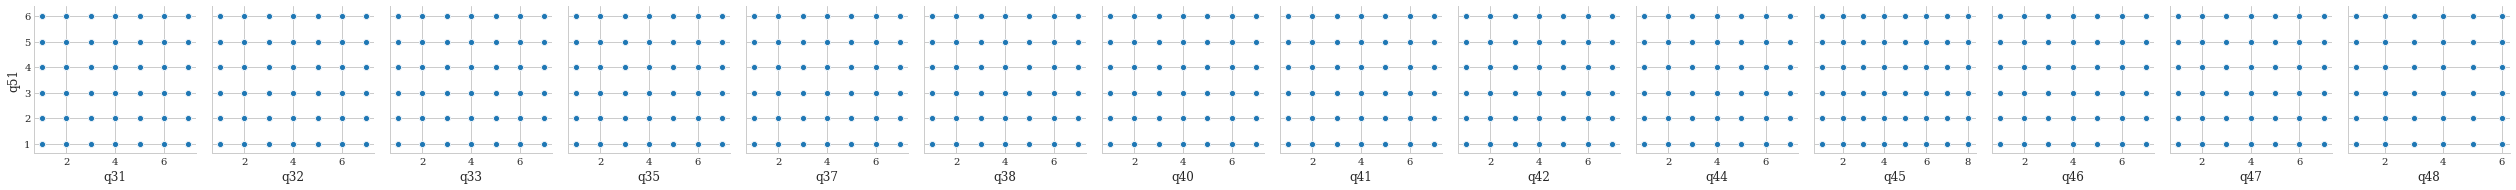

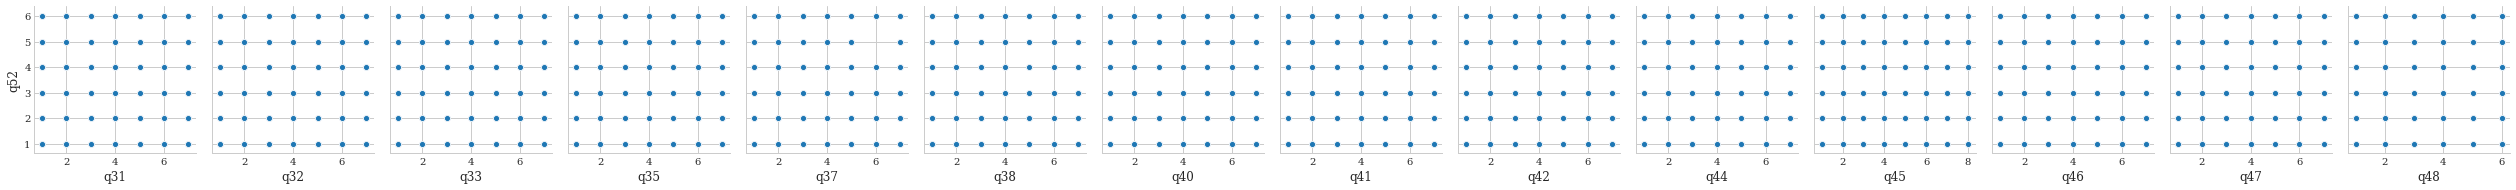

In [223]:
sns.pairplot(data=drug_yrbs, y_vars=['q49'], x_vars=["q31", "q32", "q33", "q35", "q37", "q38", "q40", "q41", "q42", "q44", "q45", "q46", "q47", "q48"])
sns.pairplot(data=drug_yrbs, y_vars=['q51'], x_vars=["q31", "q32", "q33", "q35", "q37", "q38", "q40", "q41", "q42", "q44", "q45", "q46", "q47", "q48"])
sns.pairplot(data=drug_yrbs, y_vars=['q52'], x_vars=["q31", "q32", "q33", "q35", "q37", "q38", "q40", "q41", "q42", "q44", "q45", "q46", "q47", "q48"])

Start by looking at cocaine use compared the smoking and dirnking variables

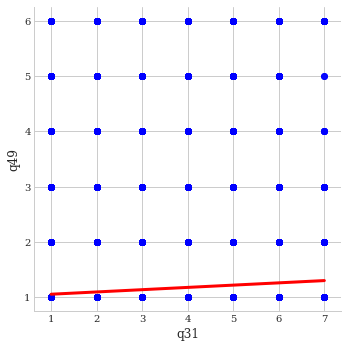

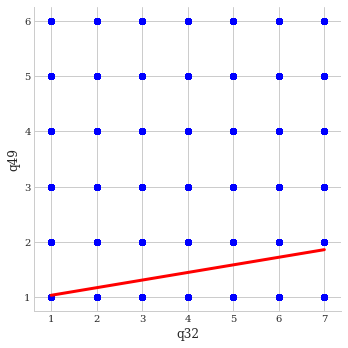

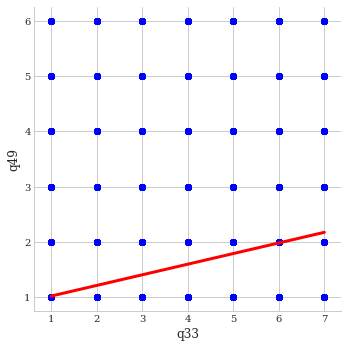

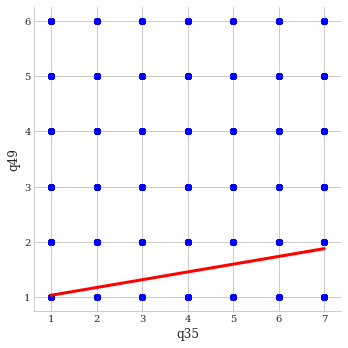

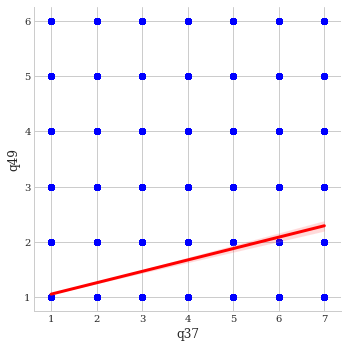

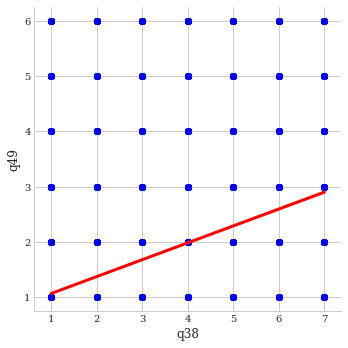

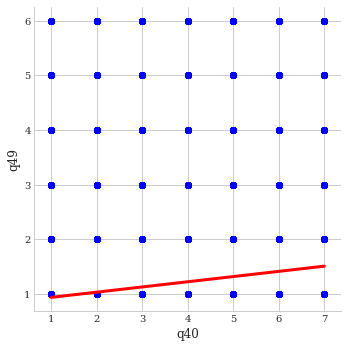

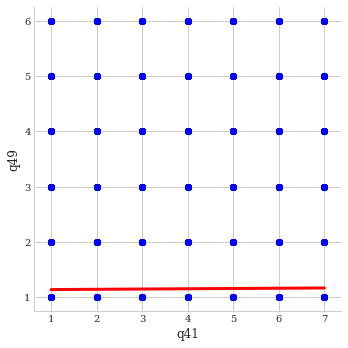

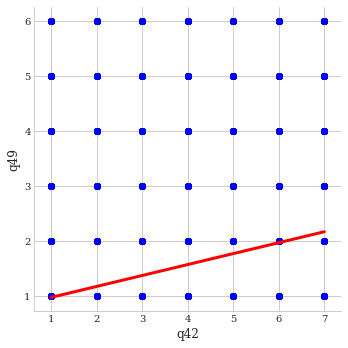

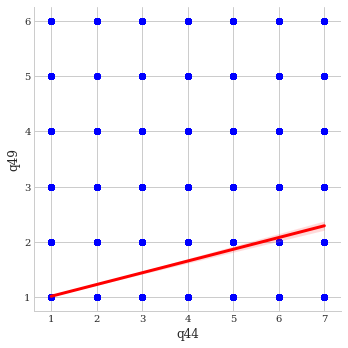

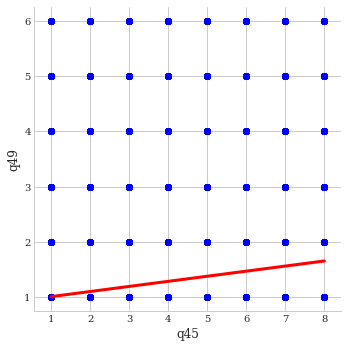

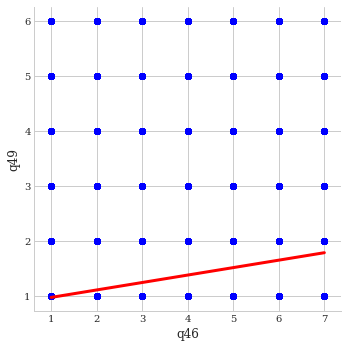

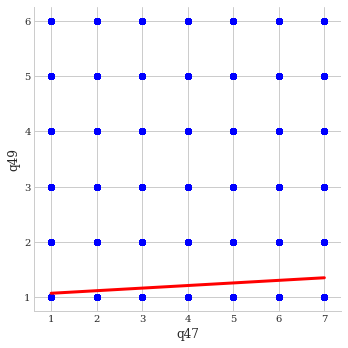

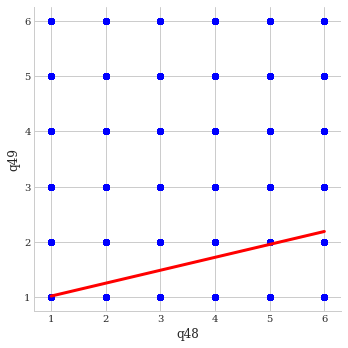

In [210]:
sns.lmplot(x="q31", y="q49", data=drug_yrbs, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})
sns.lmplot(x="q32", y="q49", data=drug_yrbs, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})
sns.lmplot(x="q33", y="q49", data=drug_yrbs, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})
sns.lmplot(x="q35", y="q49", data=drug_yrbs, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})
sns.lmplot(x="q37", y="q49", data=drug_yrbs, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})
sns.lmplot(x="q38", y="q49", data=drug_yrbs, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})
sns.lmplot(x="q40", y="q49", data=drug_yrbs, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})
sns.lmplot(x="q41", y="q49", data=drug_yrbs, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})
sns.lmplot(x="q42", y="q49", data=drug_yrbs, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})
sns.lmplot(x="q44", y="q49", data=drug_yrbs, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})
sns.lmplot(x="q45", y="q49", data=drug_yrbs, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})
sns.lmplot(x="q46", y="q49", data=drug_yrbs, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})
sns.lmplot(x="q47", y="q49", data=drug_yrbs, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})
sns.lmplot(x="q48", y="q49", data=drug_yrbs, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})

First will run a linear regression to try and predict cocaine use

In [265]:
y=drug_yrbs["q49"]
X=drug_yrbs[["q31", "q32", "q33", "q35", "q37", "q38", "q40", "q41", "q42", "q44", "q45", "q46", "q47", "q48"]]
X=sm.add_constant(X)
model1 = sm.OLS(y, X) 
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    q49   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     431.1
Date:                Sat, 18 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:34:41   Log-Likelihood:                -4732.6
No. Observations:               16443   AIC:                             9495.
Df Residuals:                   16428   BIC:                             9611.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6855      0.007     99.383      0.000       0.672       0.699
q31           -0.0185      0.002    -10.373      0.000      -0.022      -0.015
q32           -0.0289      0.007     -4.403      0.000      -0.042      -0.016
q33            0.1428      0.009     15.882      0.000       0.125       0.160
q35            0.0135      0.003      4.405      0.000       0.008       0.020
q37            0.0377      0.003     11.487      0.000       0.031       0.044
q38            0.0743      0.005     15.775      0.000       0.065       0.084
q40            0.0094      0.003      3.457      0.001       0.004       0.015
q41           -0.0062      0.002     -3.895      0.000      -0.009      -0.003
q42            0.0316      0.006      5.209      0.000       0.020       0.043
q44            0.0686      0.006     10.615      0.000       0.056       0.081
q45           -0.0408      0.003    -12.522      0.000      -0.047      -0.034
q46            0.0261      0.003      7.747      0.000       0.020       0.033
q47           -0.0195      0.002     -9.358      0.000      -0.024      -0.015
q48            0.0318      0.004      7.198      0.000       0.023       0.041
==============================================================================
Omnibus:                    21042.544   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4884603.115
Skew:                           7.029   Prob(JB):                         0.00
Kurtosis:                      86.258   Cond. No.                         32.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [266]:
predictions1=results1.predict(X)
predictions1.head()

419919    1.007356
419937    1.817008
419938    1.007356
419939    1.665310
419940    1.016784
dtype: float64

In [267]:
drug_yrbs["predicted_cocaine"]=predictions1

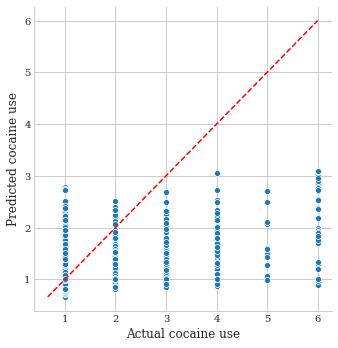

In [269]:
g=sns.relplot(x="q49", y="predicted_cocaine", data=drug_yrbs) #store the plot in "g"
g.set(xlabel="Actual cocaine use", ylabel="Predicted cocaine use") #set lables for axes
mn = min(drug_yrbs.q49.min(), drug_yrbs.predicted_cocaine.min()) #generate min coordinates for line
mx = max(drug_yrbs.q49.max(), drug_yrbs.predicted_cocaine.max()) #generate max coordinates for line
points = np.linspace(mn, mx, 100) #generate points of the line
plt.plot(points, points, color='r', linestyle='--', linewidth=1.5) #add the line to the plot
plt.show() #show the full plot
#plt.gca().plot(points, points, color='r', linestyle='--', linewidth=1.5) #also works

In [272]:
# We can also use this handy function from the DMBA package to print all the metrics in one go.
regressionSummary(drug_yrbs.q49, drug_yrbs.predicted_cocaine)


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.3227
            Mean Absolute Error (MAE) : 0.0943
          Mean Percentage Error (MPE) : -2.3608
Mean Absolute Percentage Error (MAPE) : 7.0467


Now lets try using logistic regression to predict cocaine use

In [274]:
logit_drug_yrbs = drug_yrbs

In [275]:
#Set up:
y = logit_drug_yrbs["q49"]
X = logit_drug_yrbs.drop(columns=["q49"])
train_X2, valid_X2, train_y2, valid_y2 = train_test_split(X, y, test_size=0.4, random_state=1)
print(train_X2.shape, train_y2.shape)
print(train_X2.shape, valid_y2.shape)

(9865, 20) (9865,)
(9865, 20) (6578,)


In [276]:
lreg=sklm.LogisticRegression(solver='liblinear')
lreg.fit(train_X2, train_y2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [277]:
lreg.intercept_[0]

6.1708144752718646

In [278]:
pd.DataFrame({'coefficients': lreg.coef_[0]}, index=X.columns)

,coefficients
q31,-0.065651
q32,-0.063472
q33,-0.516346
q35,-0.019218
q37,-0.097055
q38,-0.337996
q40,-0.267582
q41,0.083717
q42,-0.012468
q44,-0.325723


In [279]:
#get the predicted values in training:
lreg_predictions_tr=lreg.predict(train_X2)
lreg_predictions_tr[:5]

array([1, 1, 1, 1, 1])

In [280]:
#get the predicted probabilities in training:
lreg_predict_prob_tr=lreg.predict_proba(train_X2) # predictions for training set as probability values
lreg_predict_prob_tr

array([[9.85014197e-01, 1.06261349e-02, 3.30800838e-03, 9.51332376e-04,
        8.92593288e-05, 1.10685152e-05],
       [9.96426484e-01, 1.70162568e-03, 1.32831148e-03, 3.53378716e-04,
        7.99349628e-05, 1.10264730e-04],
       [9.94125307e-01, 1.63999608e-03, 1.12570436e-03, 1.05442467e-03,
        7.66583978e-04, 1.28798416e-03],
       ...,
       [9.57402970e-01, 3.37293854e-02, 3.77642007e-03, 4.81330131e-03,
        2.72487627e-04, 5.43596388e-06],
       [9.94125307e-01, 1.63999608e-03, 1.12570436e-03, 1.05442467e-03,
        7.66583978e-04, 1.28798416e-03],
       [9.94125307e-01, 1.63999608e-03, 1.12570436e-03, 1.05442467e-03,
        7.66583978e-04, 1.28798416e-03]])

In [281]:
logit_result_tr = pd.DataFrame({'actual': train_y2, 
                             'p(0)': [p[0] for p in lreg_predict_prob_tr],
                             'p(1)': [p[1] for p in lreg_predict_prob_tr],
                             'predicted': lreg_predictions_tr })

In [282]:
#highest probability of cocaine use:
logit_result_tr.sort_values(by='p(1)', ascending=False).head()

,actual,p(0),p(1),predicted
954589,6,0.009040,0.655086,2
947213,1,0.021105,0.643787,2
950858,1,0.068365,0.628484,2
443486,2,0.146500,0.619541,2
472517,2,0.142094,0.605905,2


In [283]:
#lowest probability of cocaine use:
logit_result_tr.sort_values(by='p(1)').head()

,actual,p(0),p(1),predicted
421215,1,0.957961,0.000116,1
470346,1,0.989359,0.000203,1
944708,6,0.395048,0.000240,6
961429,4,0.982627,0.000453,1
442185,1,0.982863,0.000700,1


In [286]:
# This is the from DMBA book package
classificationSummary(train_y2, lreg_predictions_tr)

Confusion Matrix (Accuracy 0.9769)

       Prediction
Actual    0    1    2    3    4    5
     0 9603    9    1    1    0    1
     1  134    5    1    0    0    2
     2   30    4    2    0    0    2
     3   20    3    2    2    0    1
     4    4    4    0    0    0    0
     5    8    1    0    0    0   25


In [291]:
# This is a utility from scikit
cm = confusion_matrix(train_y2, lreg_predictions_tr)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[9603    9    1    1    0    1]
 [ 134    5    1    0    0    2]
 [  30    4    2    0    0    2]
 [  20    3    2    2    0    1]
 [   4    4    0    0    0    0]
 [   8    1    0    0    0   25]]


In [292]:
# This is a utility from scikit
print("Classification Report:\n",classification_report(train_y2, lreg_predictions_tr))

Classification Report:
               precision    recall  f1-score   support

           1       0.98      1.00      0.99      9615
           2       0.19      0.04      0.06       142
           3       0.33      0.05      0.09        38
           4       0.67      0.07      0.13        28
           5       0.00      0.00      0.00         8
           6       0.81      0.74      0.77        34

    accuracy                           0.98      9865
   macro avg       0.50      0.32      0.34      9865
weighted avg       0.96      0.98      0.97      9865



/Users/shaneregel/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


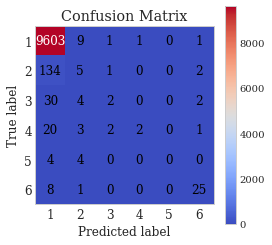

In [293]:
# You can plot the confusion matrix:
skplt.metrics.plot_confusion_matrix(train_y2, lreg_predictions_tr, figsize=(4,4), cmap="coolwarm")

In [294]:
# How good is the model on the validation dataset?
lreg_predictions_tt=lreg.predict(valid_X2)

In [295]:
print("Classification Report:\n",classification_report(valid_y2, lreg_predictions_tt))

Classification Report:
               precision    recall  f1-score   support

           1       0.98      1.00      0.99      6432
           2       0.18      0.05      0.07        85
           3       0.08      0.04      0.06        24
           4       0.00      0.00      0.00        14
           5       0.00      0.00      0.00         3
           6       0.72      0.65      0.68        20

    accuracy                           0.98      6578
   macro avg       0.33      0.29      0.30      6578
weighted avg       0.97      0.98      0.97      6578



/Users/shaneregel/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


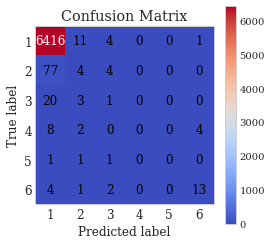

In [296]:
skplt.metrics.plot_confusion_matrix(valid_y2, lreg_predictions_tt, figsize=(4,4), cmap="coolwarm")

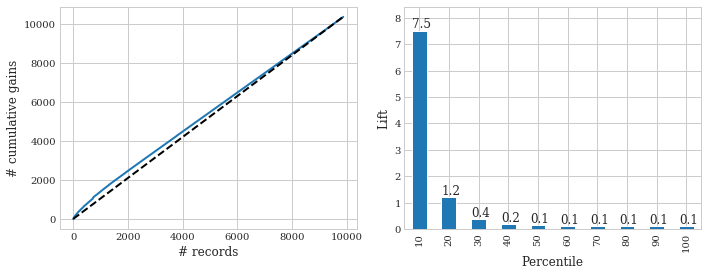

In [301]:
dfgains = logit_result_tr.sort_values(by='p(1)', ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(dfgains.actual, ax=axes[0])
liftChart(dfgains['p(1)'], title=False, ax=axes[1])
    
plt.tight_layout()
plt.show()

Now lets try KNN to predict cocaine use

In [302]:
# First, scale the predictors and predicted variables:
Xp=preprocessing.scale(drug_yrbs[["q31", "q32", "q33", "q35", "q37", "q38", "q40", "q41", "q42", "q44", "q45", "q46", "q47", "q48"]]).astype('float64')
Yp=preprocessing.scale(drug_yrbs.q49).astype('float64')#scaling

In [303]:
# Set aside a portion (e.g., 25%) of data for out-of-training-sample testing.

X3p_train, X3p_test, Y3p_train, Y3p_test = train_test_split(Xp, Yp, \
                                                            test_size=0.25, random_state=7)
print(X3p_train.shape, Y3p_train.shape)
print(X3p_test.shape, Y3p_test.shape)

(12332, 14) (12332,)
(4111, 14) (4111,)


In [306]:
# Define the KNN model parameters
knn_rcv = KNeighborsRegressor(n_neighbors=9, weights='uniform') 
# use 4 nearest neighbors weighted uniformly

In [307]:
# fit the KNN model using training sample
knn_rcv.fit(X3p_train, Y3p_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                    weights='uniform')

In [308]:
# how does the model perform in training?
knn_prediction_reg=knn_rcv.predict(X3p_train) 
#get the predictions using training data

In [311]:
# We can also use this handy function from the DMBA package to print all the metrics in one go.
regressionSummary(Y3p_train, knn_prediction_reg)


Regression statistics

                      Mean Error (ME) : 0.0115
       Root Mean Squared Error (RMSE) : 0.7260
            Mean Absolute Error (MAE) : 0.1363
          Mean Percentage Error (MPE) : 49.1749
Mean Absolute Percentage Error (MAPE) : 49.2792


In [312]:
#to rescale the predicted values, we need to first fit the original scaler:
data = drug_yrbs.q49.values
scaler = preprocessing.StandardScaler()
scaler.fit(data.reshape(-1, 1)) #reshaping is needed for 1-dimensional arrays
scaled = scaler.transform(data.reshape(-1, 1))
# for inverse transformation
inversedpredictions = scaler.inverse_transform(knn_prediction_reg)

In [313]:
regressionSummary(Y3p_train,inversedpredictions)


Regression statistics

                      Mean Error (ME) : -1.0404
       Root Mean Squared Error (RMSE) : 1.3508
            Mean Absolute Error (MAE) : 1.2054
          Mean Percentage Error (MPE) : 881.9826
Mean Absolute Percentage Error (MAPE) : 881.9947


In [314]:
# how does the model perform when there is variation on different training samples?
cvparam = KFold(3, random_state=13)
scores_mse_knn =  cross_validate(knn_rcv, X3p_train, Y3p_train, \
                                 cv=cvparam, scoring='neg_mean_squared_error') #3-fold

/Users/shaneregel/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [315]:
# how does the model perform when there is variation on different training samples?
scores_mse_knn['test_score']

array([-0.57056867, -0.60836892, -0.83355913])

In [316]:
np.sqrt(scores_mse_knn['test_score'].mean()*-1) #Multiplying by -1 to remove negativity in MSE

0.8190434892130821

In [317]:
# How does the trained model do for the testing sample?
knn_prediction_reg_tt=knn_rcv.predict(X3p_test) #get the predictions using test data

In [318]:
#average error of prediction in training data.
np.sqrt(np.square(knn_prediction_reg_tt-Y3p_test).mean())

0.7617419260763529

In [319]:
regressionSummary(Y3p_test,knn_prediction_reg_tt)


Regression statistics

                      Mean Error (ME) : -0.0042
       Root Mean Squared Error (RMSE) : 0.7617
            Mean Absolute Error (MAE) : 0.1477
          Mean Percentage Error (MPE) : 59.6032
Mean Absolute Percentage Error (MAPE) : 59.6929


Now lets try Naive-Bayes to predict cocaine use

In [321]:
# split the original data frame into a train and test using the same random_state
train_df, valid_df = train_test_split(drug_yrbs, test_size=0.10, random_state=1)

In [322]:
pd.set_option('precision', 3) # to get only 3 digit rounded numbers for probabilities

In [323]:
# probability of cocaine use
print(train_df['q49'].value_counts() / len(train_df))

1    9.755e-01
2    1.406e-02
3    3.717e-03
6    3.379e-03
4    2.635e-03
5    7.433e-04
Name: q49, dtype: float64


In [324]:
predictors = ["q31", "q32", "q33", "q35", "q37", "q38", "q40", "q41", "q42", "q44", "q45", "q46", "q47", "q48"]
for predictor in predictors:
    # construct the frequency table
    df = train_df[['q49', predictor]]
    freqTable = df.pivot_table(index='q49', columns=predictor, aggfunc=len)

    # divide each row by the sum of the row to get conditional probabilities
    propTable = freqTable.apply(lambda x: x / sum(x), axis=1)
    print(propTable)
    print()

q31      1      2      3      4      5      6      7
q49                                                 
1    0.774  0.021  0.018  0.036  0.069  0.067  0.016
2    0.125  0.043  0.082  0.216  0.279  0.216  0.038
3      NaN    NaN    NaN    NaN    NaN    NaN    NaN
4    0.026  0.179  0.103  0.256  0.282  0.128  0.026
5      NaN    NaN    NaN    NaN    NaN    NaN    NaN
6      NaN    NaN    NaN    NaN    NaN    NaN    NaN

q32      1      2      3      4      5      6      7
q49                                                 
1    0.934  0.025  0.011  0.007  0.007  0.005  0.010
2    0.466  0.120  0.091  0.038  0.077  0.053  0.154
3    0.309  0.055  0.073  0.073  0.109  0.127  0.255
4      NaN    NaN    NaN    NaN    NaN    NaN    NaN
5      NaN    NaN    NaN    NaN    NaN    NaN    NaN
6      NaN    NaN    NaN    NaN    NaN    NaN    NaN

q33      1      2      3      4      5      6          7
q49                                                     
1    0.934  0.022  0.015  0.022  0.0

In [337]:
predictors = ["q31", "q32", "q33", "q35", "q37", "q38", "q40", "q41", "q42", "q44", "q45", "q46", "q47", "q48"]
outcome = "q49"

X = pd.get_dummies(drug_yrbs[predictors])
y = (drug_yrbs[outcome] == "q49").astype(int)
classes = ["1", "2", "3", "4", "5", "6"]

/Users/shaneregel/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [338]:
# split into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.10, random_state=1)

In [339]:
# run naive Bayes
drug_nb = MultinomialNB(alpha=0.01)
drug_nb.fit(X_train, y_train)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [340]:
#Training performance
y_train_pred = drug_nb.predict(X_train)
classificationSummary(y_train, y_train_pred, class_names=classes)

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual     1     2     3     4     5     6
     1

IndexError: tuple index out of range

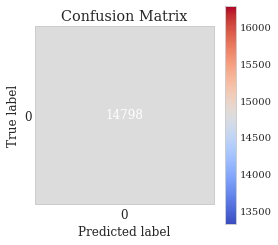

In [336]:
skplt.metrics.plot_confusion_matrix(y_train, y_train_pred, figsize=(4,4), cmap="coolwarm")

Now lets look at decision trees to predict cocaine use

In [355]:
# First, define the X (predictor/independent) and the Y (predicted/dependent) variables:
# SciKit doesn't work with Pandas dataframes, so we just need the matrix of values.
X = drug_yrbs[["q31", "q32", "q33", "q35", "q37", "q38", "q40", "q41", "q42", "q44", "q45", "q46", "q47", "q48"]].values
Y = drug_yrbs.q49

In [356]:
# Second, split the data into training and test portions:
# I am using 25% of data for testing and 75% for training.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=7)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(12332, 14) (12332,)
(4111, 14) (4111,)


In [357]:
# Third, select the modeling approach for fitting: Decision Tree regression
DTsalesreg=DecisionTreeRegressor(random_state=23)

In [358]:
# Fit the model on training data
# Since we are using the training portion of the data, we are now "training" our model.
DTsalesreg.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=23, splitter='best')

In [362]:
DTRgraph = print_tree(DTsalesreg, features=["q31", "q32", "q33", "q35", "q37", "q38", "q40", "q41", "q42", "q44", "q45", "q46", "q47", "q48"])
Image(DTRgraph.create_png())

NameError: name 'print_tree' is not defined